In [1]:
import os
import torch
from sklearn.metrics import classification_report
from dataset import get_train_test_data
from train import train_model 
from plotting import plot_confusion_matrix, plot_training_metrics

## Machine Learning Approach

Loading Data, and splitting into train and test sets. To be used for all of the ML models

Loading Dataset ...


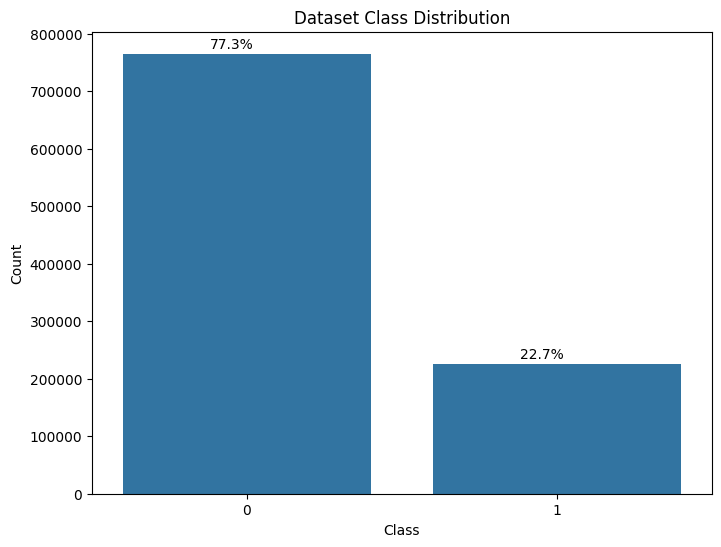

In [2]:
X_train, X_test, y_train, y_test = get_train_test_data("data/all23pub.csv")

### Logistic Regression Binary Classifier

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    152743
           1       0.87      0.92      0.89     45347

    accuracy                           0.95    198090
   macro avg       0.92      0.94      0.93    198090
weighted avg       0.95      0.95      0.95    198090



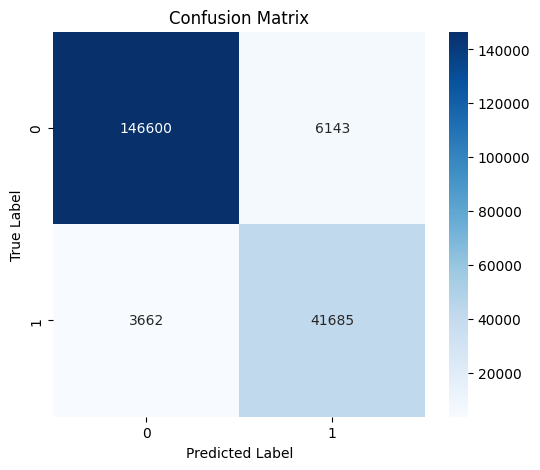

In [3]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

log_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{log_report}")

save_dir = "artifacts/log"
os.makedirs(save_dir, exist_ok=True)

with open(f"{save_dir}/log_classification_report.txt", "w") as file:
    file.write(log_report)

plot_confusion_matrix(y_test, y_pred, f"{save_dir}/log_confusion_matrix.png")

### SVM Binary Classifier

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    152743
           1       0.87      0.92      0.90     45347

    accuracy                           0.95    198090
   macro avg       0.92      0.94      0.93    198090
weighted avg       0.95      0.95      0.95    198090



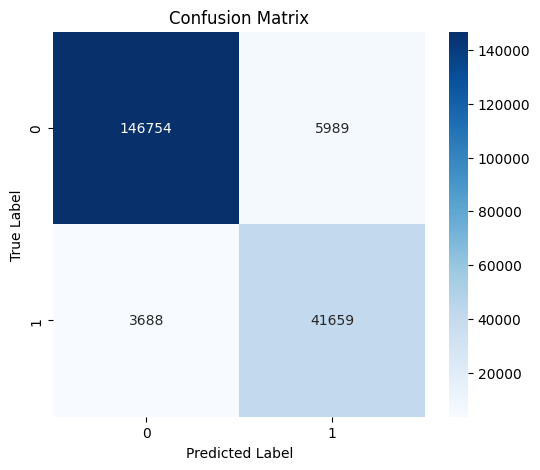

In [4]:
from sklearn.linear_model import SGDClassifier

svm_model = SGDClassifier(loss='hinge', random_state=42) # linear SVM
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

# Evaluate the model
svm_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{svm_report}")

save_dir = "artifacts/svm"
os.makedirs(save_dir, exist_ok=True)

with open(f"{save_dir}/svm_classification_report.txt", "w") as file:
    file.write(svm_report)

plot_confusion_matrix(y_test, y_pred, f"{save_dir}/svm_confusion_matrix_imbalanced.png")

### Decision Tree Classifier

Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    152743
           1       0.95      0.95      0.95     45347

    accuracy                           0.98    198090
   macro avg       0.97      0.97      0.97    198090
weighted avg       0.98      0.98      0.98    198090



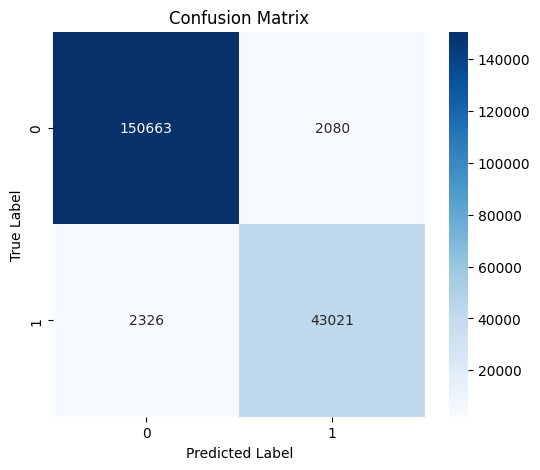

In [5]:
from sklearn.tree import DecisionTreeClassifier

dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
y_pred = dtree_model.predict(X_test)

# Evaluate the model
dtree_report = classification_report(y_test, y_pred)
print(f"Classification Report: \n{dtree_report}")

save_dir = "artifacts/tree"
os.makedirs(save_dir, exist_ok=True)

with open(f"{save_dir}/tree_classification_report.txt", "w") as file:
    file.write(dtree_report)

plot_confusion_matrix(y_test, y_pred, f"{save_dir}/tree_confusion_matrix.png")

## Deep Learning Apporach

### Simple MLP Neural Network as a Binary Classfier

Loading Dataset ...


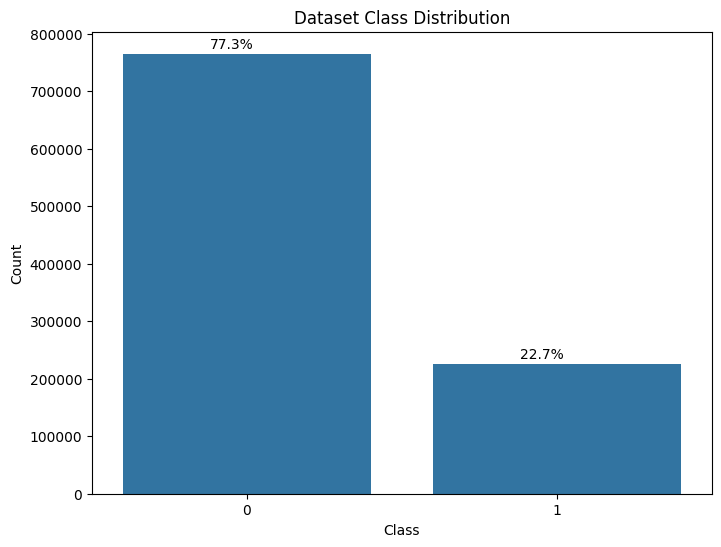

Training using device: cuda


Epoch 50/50: 100%|██████████| 50/50 [07:39<00:00,  9.20s/it, Train Loss=0.089, Train Accuracy=0.967]



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98    153041
         1.0       0.91      0.93      0.92     45049

    accuracy                           0.96    198090
   macro avg       0.94      0.95      0.95    198090
weighted avg       0.96      0.96      0.96    198090



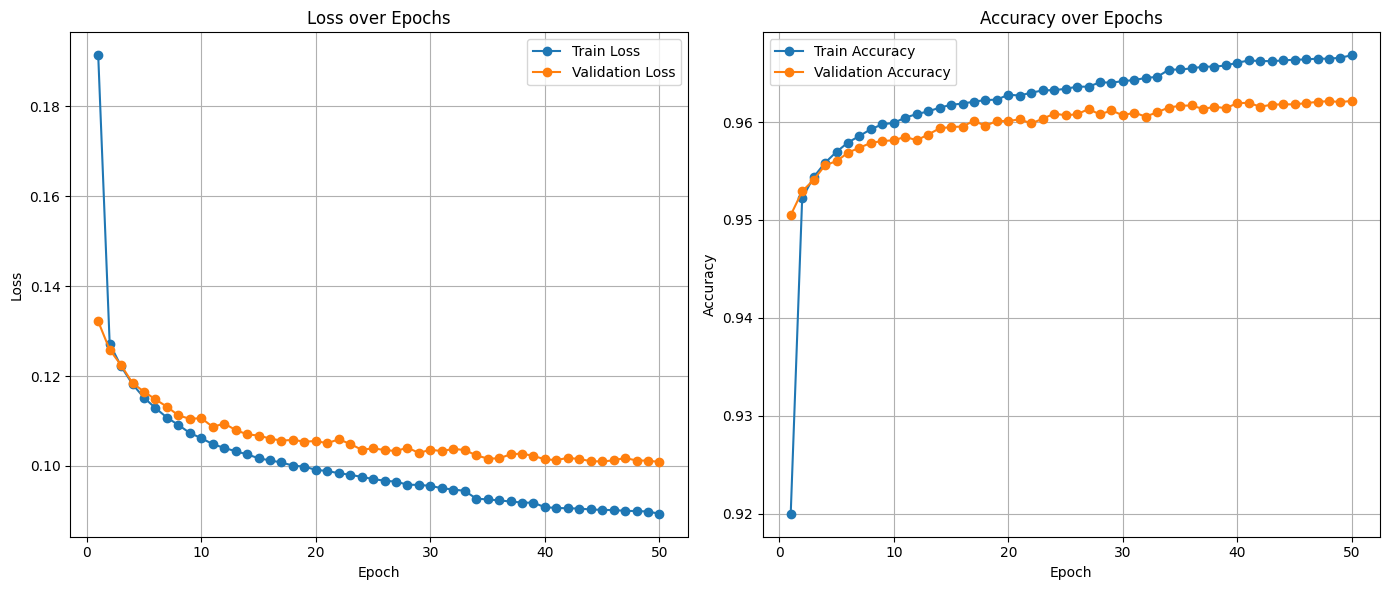

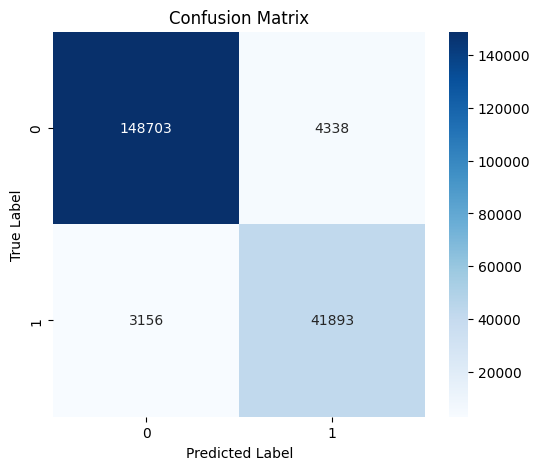

Training complete.


In [6]:
from models import MLPBinaryClassifier

mlp_model, mlp_metrics, mlp_test_true, mlp_test_pred = train_model(
    data_path="./data/all23pub.csv", 
    model_class=MLPBinaryClassifier, 
    num_epochs=50,
    batch_size=1024,
    learning_rate=0.000175,
    balance_dataset=False, 
    random_seed=42
)

# Classification Report
mlp_report = classification_report(mlp_test_true, mlp_test_pred)
print(f'\nClassification Report: \n{mlp_report}')

save_dir = "artifacts/mlp"
os.makedirs(save_dir, exist_ok=True)

# Save classification report 
with open(f"{save_dir}/mlp_classification_report.txt", "w") as file:
    file.write(mlp_report)

# Plotting
plot_training_metrics(mlp_metrics, save_path=f"{save_dir}/mlp_training_metrics_imbalanced.png")
plot_confusion_matrix(mlp_test_true, mlp_test_pred, save_path=f"{save_dir}/mlp_confusion_imbalanced.png")

# Save metrics and model
mlp_metrics.to_csv(f'{save_dir}/mlp_training_metrics_imbalanced.csv', index=False)
torch.save(mlp_model.state_dict(), f'{save_dir}/mlp_model_imbalanced.pt')

print("Training complete.")

### Deep Neural Network as Binary Classfier with Gaussian Error Linear Unit
#### Original Dataset Distribution 

Loading Dataset ...


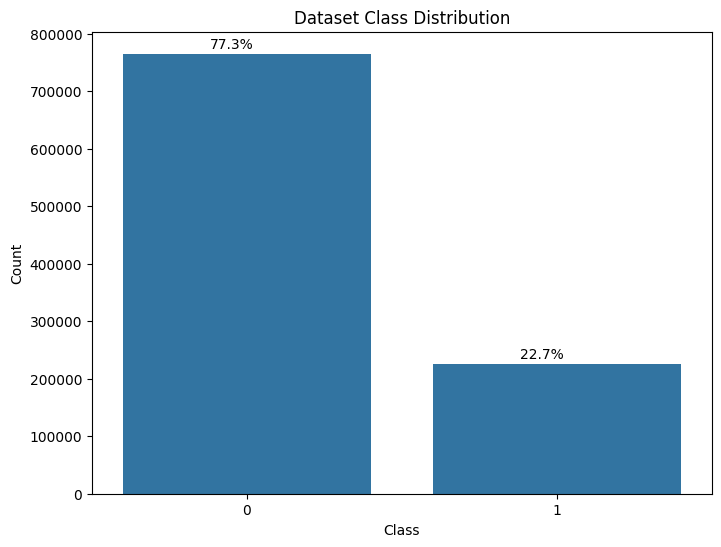

Training using device: cuda


Epoch 50/50: 100%|██████████| 50/50 [08:32<00:00, 10.26s/it, Train Loss=0.104, Train Accuracy=0.961]



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97    153041
         1.0       0.91      0.93      0.92     45049

    accuracy                           0.96    198090
   macro avg       0.94      0.95      0.95    198090
weighted avg       0.96      0.96      0.96    198090



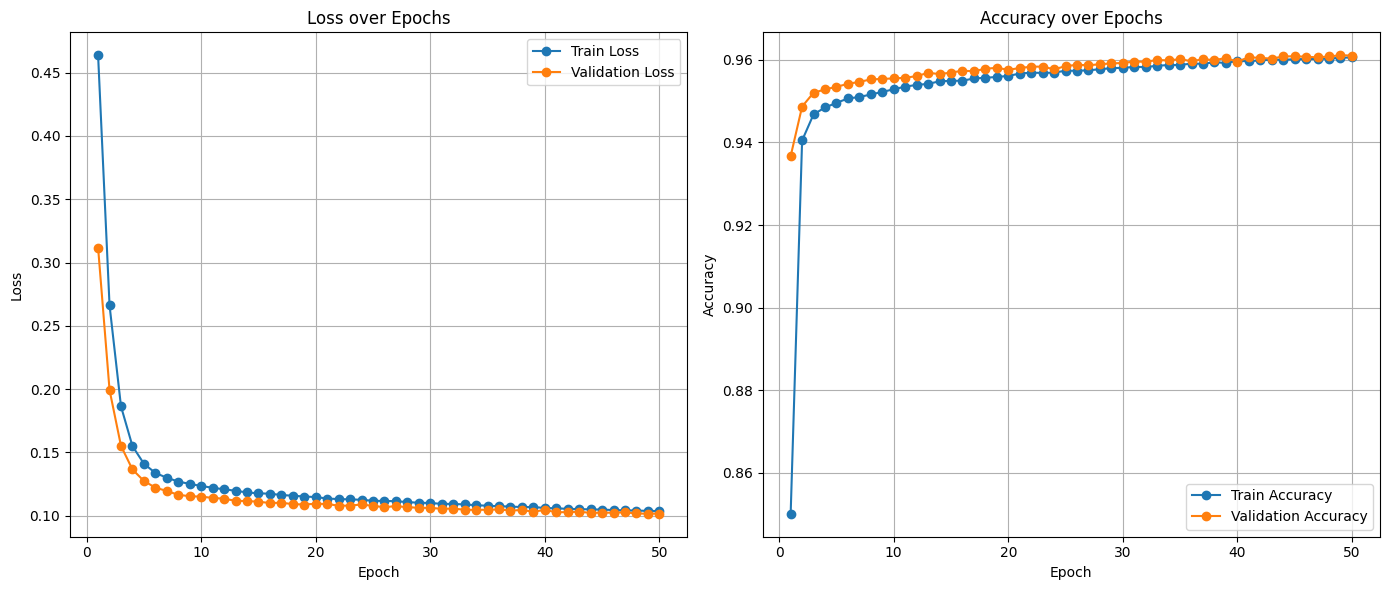

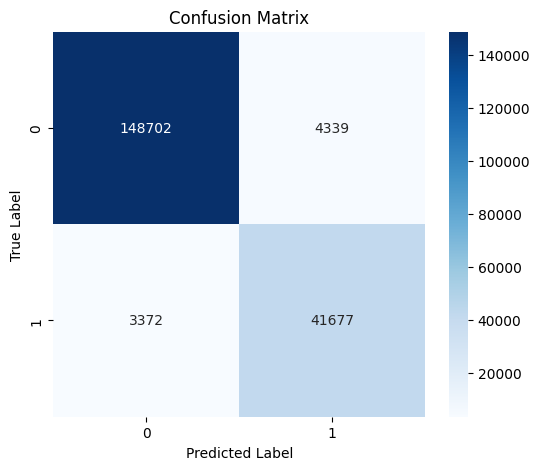

Training complete.


In [7]:
from models import DNNBinaryClassifier

dnn_model, dnn_metrics, dnn_test_true, dnn_test_pred = train_model(
    data_path="./data/all23pub.csv", 
    model_class=DNNBinaryClassifier, 
    num_epochs=50,
    batch_size=1024,
    learning_rate=0.000175,
    balance_dataset=False, 
    random_seed=42
)

# Classification Report
dnn_report = classification_report(dnn_test_true, dnn_test_pred)
print(f'\nClassification Report: \n{dnn_report}')

save_dir = "artifacts/dnn"
os.makedirs(save_dir, exist_ok=True)

# Save classification report 
with open(f"{save_dir}/dnn_classification_report_imbalanced.txt", "w") as file:
    file.write(dnn_report)


# Plotting
plot_training_metrics(dnn_metrics, save_path=f"{save_dir}/dnn_training_metrics_imbalanced.png")
plot_confusion_matrix(dnn_test_true, dnn_test_pred, save_path=f"{save_dir}/dnn_confusion_imbalanced.png")

# Save metrics and model
dnn_metrics.to_csv(f"{save_dir}/dnn_training_metrics_imbalanced.csv", index=False)
torch.save(dnn_model.state_dict(), f"{save_dir}/dnn_model_imbalanced.pt")


print("Training complete.")

#### Balanced Dataset Distribution 

Loading Dataset ...
Balancing Dataaset ...
Majority Class: 0
Minority Class: 1
Majority Samples To Keep: 229561


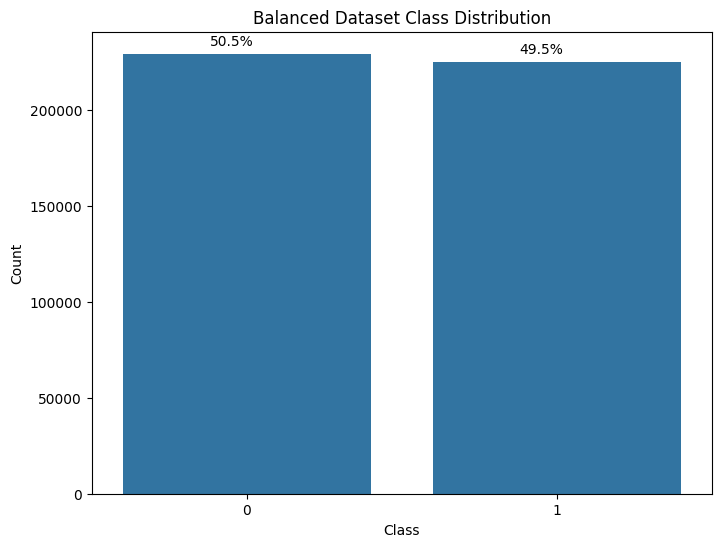

Training using device: cuda


Epoch 50/50: 100%|██████████| 50/50 [03:38<00:00,  4.37s/it, Train Loss=0.121, Train Accuracy=0.957]



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96     45913
         1.0       0.94      0.97      0.96     45049

    accuracy                           0.96     90962
   macro avg       0.96      0.96      0.96     90962
weighted avg       0.96      0.96      0.96     90962



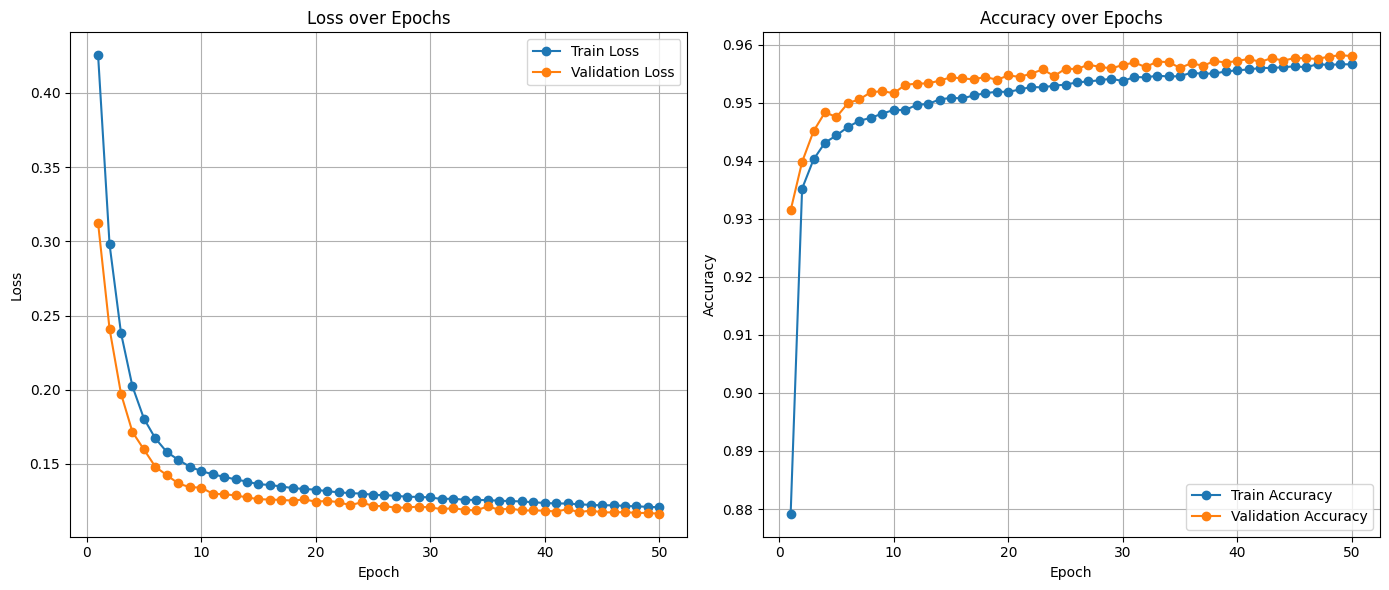

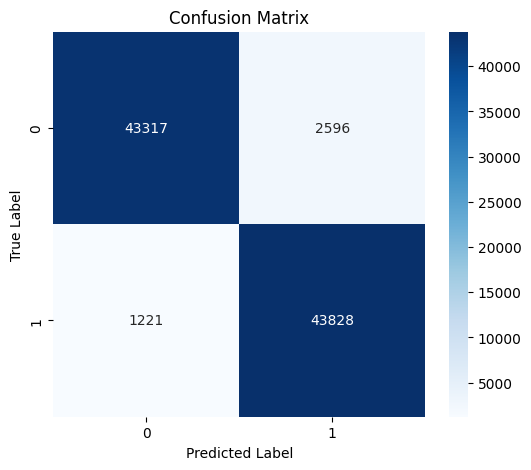

Training complete.


In [8]:
from models import DNNBinaryClassifier

dnn_model, dnn_metrics, dnn_test_true, dnn_test_pred = train_model(
    data_path="./data/all23pub.csv", 
    model_class=DNNBinaryClassifier, 
    num_epochs=50,
    batch_size=1024,
    learning_rate=0.000175,
    balance_dataset=True, 
    balance_majority_ratio=0.3,
    random_seed=42
)

# Classification Report
dnn_report_balanced = classification_report(dnn_test_true, dnn_test_pred)
print(f'\nClassification Report: \n{dnn_report_balanced}')

save_dir = "artifacts/dnn"
os.makedirs(save_dir, exist_ok=True)

# Save classification report 
with open(f"{save_dir}/dnn_classification_report_balanced.txt", "w") as file:
    file.write(dnn_report_balanced)

# Plotting
plot_training_metrics(dnn_metrics, save_path=f"{save_dir}/dnn_training_metrics_balanced.png")
plot_confusion_matrix(dnn_test_true, dnn_test_pred, save_path=f"{save_dir}/dnn_confusion_balanced.png")

# Save metrics and model
dnn_metrics.to_csv(f"{save_dir}/dnn_training_metrics_balanced.csv", index=False)
torch.save(dnn_model.state_dict(), f"{save_dir}/dnn_model_balanced.pt")
print("Training complete.")

### Residual Deep Neural Network as a Binary Classfier with Gaussian Error Linear Unit and Residual Layers, inspired by ResNet
#### Balanced Dataset Distribution 

Loading Dataset ...
Balancing Dataaset ...
Majority Class: 0
Minority Class: 1
Majority Samples To Keep: 229561


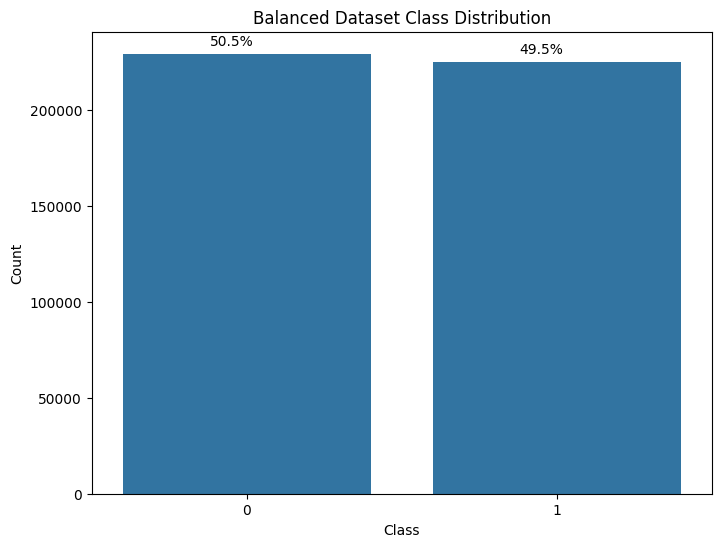

Training using device: cuda


Epoch 50/50: 100%|██████████| 50/50 [05:22<00:00,  6.45s/it, Train Loss=0.107, Train Accuracy=0.961]



Classification Report: 
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96     45913
         1.0       0.95      0.97      0.96     45049

    accuracy                           0.96     90962
   macro avg       0.96      0.96      0.96     90962
weighted avg       0.96      0.96      0.96     90962



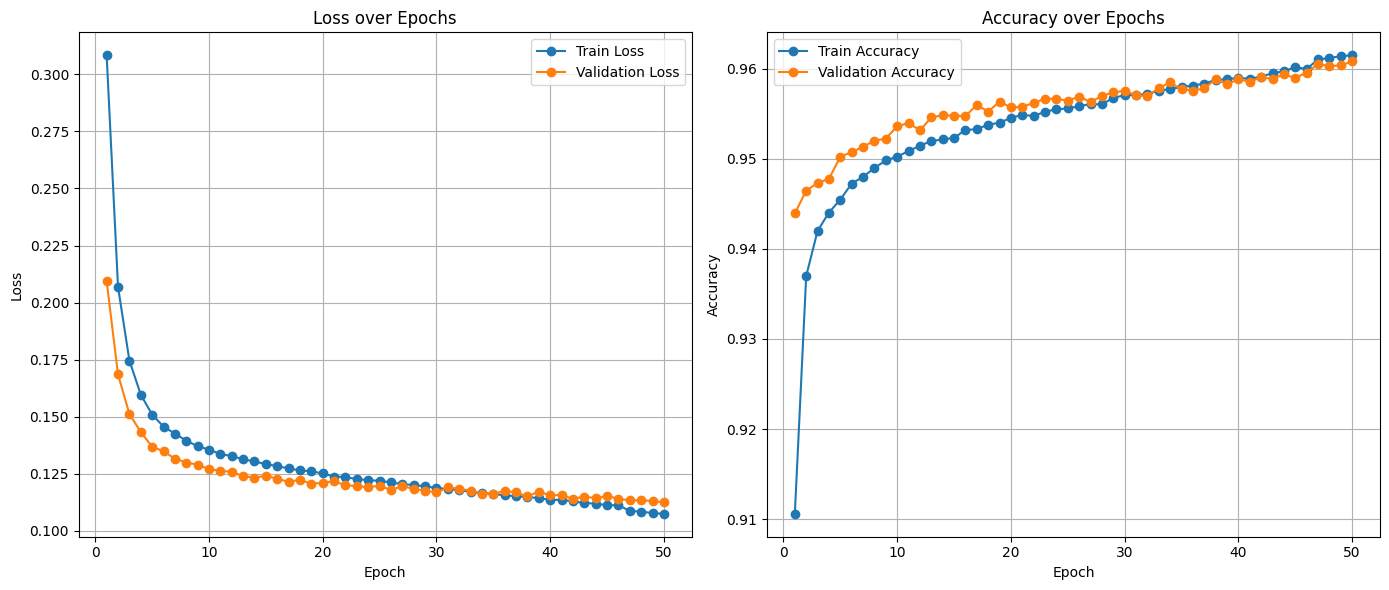

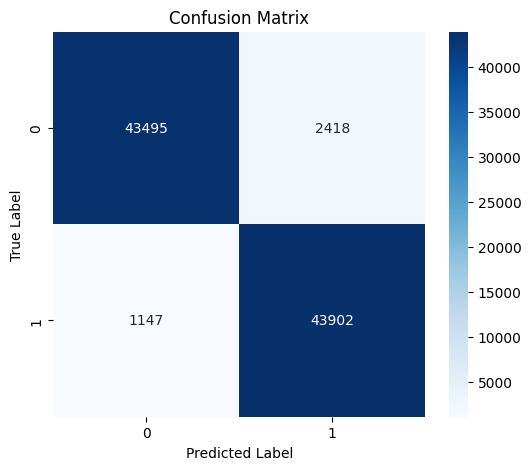

Training complete.


In [9]:
from models import ResidualBinaryClassifier

res_model, res_metrics, res_test_true, res_test_pred = train_model(
    data_path='./data/all23pub.csv', 
    model_class=ResidualBinaryClassifier, 
    num_epochs=50,
    batch_size=1024,
    learning_rate=0.000175,
    balance_dataset=True, 
    balance_majority_ratio=0.3,
    random_seed=42
)

# Classification Report
res_report_balanced = classification_report(res_test_true, res_test_pred)
print(f'\nClassification Report: \n{res_report_balanced}')

save_dir = "artifacts/res"
os.makedirs(save_dir, exist_ok=True)

# Save classification report 
with open(f"{save_dir}/res_classification_report_balanced.txt", "w") as file:
    file.write(res_report_balanced)

# Plotting
plot_training_metrics(res_metrics, save_path=f"{save_dir}/res_training_metrics_balanced.png")
plot_confusion_matrix(res_test_true, res_test_pred, save_path=f"{save_dir}/res_confusion_balanced.png")

# Save metrics and model
res_metrics.to_csv(f"{save_dir}/res_training_metrics_balanced.csv", index=False)
torch.save(res_model.state_dict(), f"{save_dir}/res_model_balanced.pt")
print("Training complete.")